In [ ]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx
from ema_workbench.util import utilities

In [ ]:
# make sure pandas is version 1.0 or higher
# make sure networkx is verion 2.4 or higher
print(pd.__version__)
print(nx.__version__)

In [ ]:
from ema_workbench import (Model, Policy, ema_logging, SequentialEvaluator, MultiprocessingEvaluator, CategoricalParameter,
                           ScalarOutcome, IntegerParameter, RealParameter, Scenario, perform_experiments)
from problem_formulation import get_model_for_problem_formulation, sum_over, sum_over_time
import time
from dike_model_function import DikeNetwork


In [ ]:
ema_logging.log_to_stderr(ema_logging.INFO)

# choose problem formulation number, between 0-5
# each problem formulation has its own list of outcomes
dike_model, planning_steps = get_model_for_problem_formulation(3)

In [ ]:
# enlisting uncertainties, their types (RealParameter/IntegerParameter/CategoricalParameter), lower boundary, and upper boundary
import copy

for unc in dike_model.uncertainties:
    print(repr(unc))

uncertainties = copy.deepcopy(dike_model.uncertainties)

In [ ]:
# enlisting policy levers, their types (RealParameter/IntegerParameter), lower boundary, and upper boundary
for policy in dike_model.levers:
    print(repr(policy))

levers = copy.deepcopy(dike_model.levers)

In [ ]:
# enlisting outcomes
for outcome in dike_model.outcomes:
    print(repr(outcome))

In [ ]:
# running the model through EMA workbench
with MultiprocessingEvaluator(dike_model) as evaluator:
    results = evaluator.perform_experiments(scenarios=50)

print(type(results))



Eens kijken of het lukt om het te printen naar csv

In [12]:

import pandas as pd

results_df = {1,3,4,5}
results_pdf = pd.DataFrame(results_df, columns=['Result'])

print(results_pdf)

#results_pdf.to_csv('.../results/outcomes_sc50p4.csv', index=False)


   Result
0       1
1       3
2       4
3       5


In [16]:
# observing the simulation runs
experiments, outcomes = results
print(outcomes.keys())

experiments

dict_keys(['A.1 Total Costs', 'A.1_Expected Number of Deaths', 'A.2 Total Costs', 'A.2_Expected Number of Deaths', 'A.3 Total Costs', 'A.3_Expected Number of Deaths', 'A.4 Total Costs', 'A.4_Expected Number of Deaths', 'A.5 Total Costs', 'A.5_Expected Number of Deaths', 'RfR Total Costs', 'Expected Evacuation Costs'])


,A.0_ID flood wave shape,A.1_Bmax,A.1_Brate,A.1_pfail,A.2_Bmax,A.2_Brate,A.2_pfail,A.3_Bmax,A.3_Brate,A.3_pfail,...,A.4_DikeIncrease 0,A.4_DikeIncrease 1,A.4_DikeIncrease 2,A.5_DikeIncrease 0,A.5_DikeIncrease 1,A.5_DikeIncrease 2,EWS_DaysToThreat,scenario,policy,model
0,132,35.599943,10.0,0.286387,267.396662,10.0,0.553073,83.293425,1.0,0.230423,...,3,5,0,1,5,2,3,4,0,dikesnet
1,108,170.028884,10.0,0.657695,99.974343,1.0,0.223887,80.491734,10.0,0.802576,...,3,5,0,1,5,2,3,5,0,dikesnet
2,56,260.709422,1.0,0.488375,210.920666,1.0,0.175170,265.901611,1.5,0.487010,...,3,5,0,1,5,2,3,6,0,dikesnet
3,118,286.952153,10.0,0.166473,123.363736,10.0,0.249204,39.183187,1.5,0.536458,...,3,5,0,1,5,2,3,7,0,dikesnet
4,49,319.481327,1.0,0.455978,222.567576,1.5,0.849501,332.366223,1.0,0.675901,...,3,5,0,1,5,2,3,8,0,dikesnet
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,101,273.533061,1.0,0.727535,326.771505,1.5,0.497850,231.884047,1.0,0.656247,...,9,1,9,4,1,6,2,49,3,dikesnet
196,63,244.915954,1.0,0.970451,142.852279,1.0,0.069853,190.782997,1.0,0.975088,...,9,1,9,4,1,6,2,50,3,dikesnet
197,124,180.121381,1.0,0.983615,253.931394,10.0,0.023342,128.303117,10.0,0.305256,...,9,1,9,4,1,6,2,51,3,dikesnet
198,76,216.639460,10.0,0.753239,230.664161,1.0,0.743879,250.941598,1.0,0.911945,...,9,1,9,4,1,6,2,52,3,dikesnet


AttributeError: 'function' object has no attribute 'legend_elements'

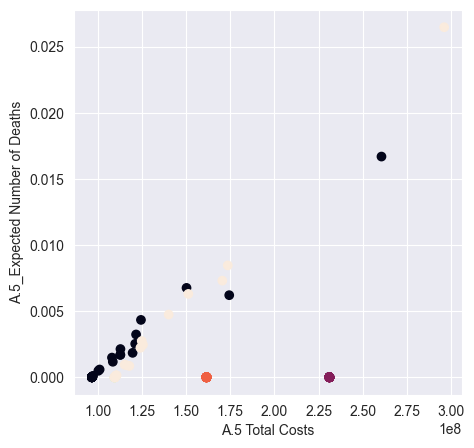

In [14]:

## Jeanine code scatterplot
fig, axs = plt.subplots(1, figsize=(5, 5))

axs.set_ylabel('A.5_Expected Number of Deaths')
axs.set_xlabel('A.5 Total Costs')
axs.scatter(outcomes['A.5 Total Costs'], outcomes['A.5_Expected Number of Deaths'], c=experiments.policy)

unique_policies = experiments.policy.unique()
labels = [f'Policy {policy}' for policy in unique_policies]

legend = axs.legend(*plt.scatter.legend_elements(), labels=labels, title='Policies')

plt.show()

In [17]:
sns.pairplot(pd.DataFrame.from_dict(outcomes))
plt.show()

In [15]:
## Jeanine code worst
worst_A5 = np.where(outcomes['A.5_Expected Number of Deaths'] == np.amax(outcomes['A.5_Expected Number of Deaths']))
experiments.loc[worst_A5]


,A.0_ID flood wave shape,A.1_Bmax,A.1_Brate,A.1_pfail,A.2_Bmax,A.2_Brate,A.2_pfail,A.3_Bmax,A.3_Brate,A.3_pfail,...,A.4_DikeIncrease 0,A.4_DikeIncrease 1,A.4_DikeIncrease 2,A.5_DikeIncrease 0,A.5_DikeIncrease 1,A.5_DikeIncrease 2,EWS_DaysToThreat,scenario,policy,model
181,128,175.917571,1.5,0.934954,193.015477,1.0,0.046922,344.48866,10.0,0.26959,...,9,1,9,4,1,6,2,35,3,dikesnet


In [19]:
# only works because we have scalar outcomes
pd.DataFrame(outcomes)

In [20]:
# defining specific policies
# for example, policy 1 is about extra protection in upper boundary
# policy 2 is about extra protection in lower boundary
# policy 3 is extra protection in random locations


def get_do_nothing_dict():
    return {l.name: 0 for l in dike_model.levers}


policies = [
    Policy(
        "policy 1",
        **dict(
            get_do_nothing_dict(),
            **{"0_RfR 0": 1, "0_RfR 1": 1, "0_RfR 2": 1, "A.1_DikeIncrease 0": 5}
        )
    ),
    Policy(
        "policy 2",
        **dict(
            get_do_nothing_dict(),
            **{"4_RfR 0": 1, "4_RfR 1": 1, "4_RfR 2": 1, "A.5_DikeIncrease 0": 5}
        )
    ),
    Policy(
        "policy 3",
        **dict(
            get_do_nothing_dict(),
            **{"1_RfR 0": 1, "2_RfR 1": 1, "3_RfR 2": 1, "A.3_DikeIncrease 0": 5}
        )
    ),
]

[MainProcess/INFO] pool started with 12 workers
[MainProcess/INFO] performing 100 scenarios * 3 policies * 1 model(s) = 300 experiments
100%|████████████████████████████████████████| 300/300 [00:42<00:00,  7.12it/s]
[MainProcess/INFO] experiments finished
[MainProcess/INFO] terminating pool


In [ ]:
# pass the policies list to EMA workbench experiment runs
n_scenarios = 100
with MultiprocessingEvaluator(dike_model) as evaluator:
    results = evaluator.perform_experiments(n_scenarios, policies)

In [ ]:
experiments, outcomes = results

In [ ]:
# only works because we have scalar outcomes
pd.DataFrame(outcomes)